In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    "Resources/lending_data.csv",
)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.drop(columns=["loan_status"])

In [4]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split (we do 80% training, 20% testing)
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62028, 7), (15508, 7), (62028,), (15508,))

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)
model

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
prediction = model.predict(X_test)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
#Let's calculate balaced_accuracy_score to test our model
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, prediction)

0.9668615123225841

In [10]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix[:10])

[[14924    77]
 [   31   476]]


In [11]:
# Print the classification report for the model
class_report = classification_report(y_test, prediction)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.94      0.90       507

    accuracy                           0.99     15508
   macro avg       0.93      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

Precisions: And it is 1.00 for healthy loans, and it means it is correct almost 100% of the time.
While high-risk loans are almost 86% accurate. And it means that some predicted high-risk loans might actually be healthy.

---

### Visualization

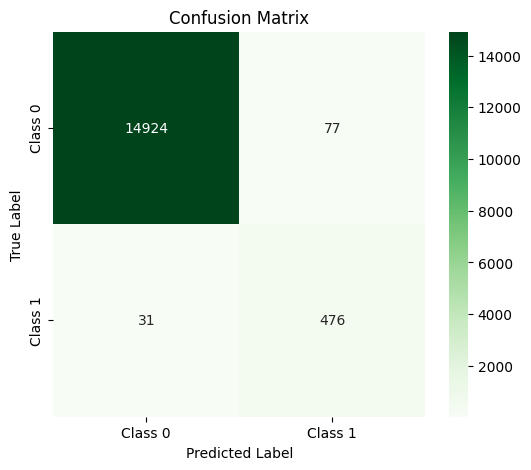

In [12]:
# I wanted to create heatmap of this data to see how I can visualize 
# confusion_matrix and with a help of ChatGPT and Seaborn let's do it

import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, prediction)

# Define class labels
labels = ["Class 0", "Class 1"]

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

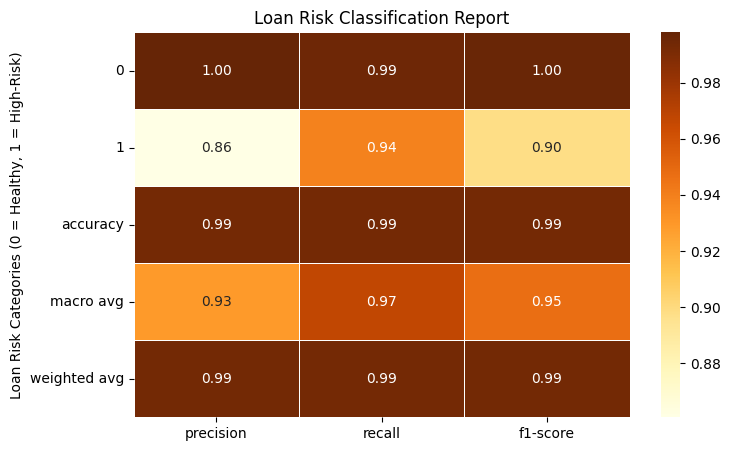

In [13]:
# I wanted to create heatmap of this data to see how I can visualize 
# classification_report and with a help of ChatGPT and Seaborn let's do it

# Compute the classification report
report = classification_report(y_test, prediction, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).T

# Drop the 'support' column for better visualization
report_df = report_df.drop(columns=["support"], errors="ignore")

# 🔹 Plot the Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df, annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Loan Risk Classification Report")
plt.ylabel("Loan Risk Categories (0 = Healthy, 1 = High-Risk)")

# Show the plot
plt.show()